 # <center>Titanic Survival Statistics</center>

This document is desinged to assess 5 of the 8 factors that lead to a passenger's survival onboard the Titanic as per data collected  [here](https://www.kaggle.com/c/titanic/data).

Factors:
* Class
* Sex
* Age
* Family Onboard (Not inspected here)
* Ticket # (Not inspected here)
* Fare
* Cabin (Not inspected here)
* Embarked

## Import Data

In [1]:
import unicodecsv
import pandas as pd
import matplotlib.pyplot as plt

# Allow plots to show inline in notebook
%matplotlib inline

# Read in CSV file. This definition is provided by Udacity.com, and is the only direct copy of outside code
def read_csv(filename):
    '''Returns a dictionary of the CSV file'''
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

tdata = read_csv('titanic_data.csv')

## Clean Data

In [2]:
def parse_ticket(ticket):
    '''Returns int: the numerical value of the ticket string. Returns "None" if ticket number not at end of string'''
    if ticket == '':
        return None
    else:
        ticket_reverse_split = ticket[::-1].split(' ', 1)
        ticket_num = ticket_reverse_split[0][::-1]
    try:
        return int(ticket_num)
    except:
        return None
    
def parse_int(number):
    '''Returns number string as int. Returns "None" if empty'''
    if number == "":
        return None
    return int(number)
    
def parse_float(number):
    '''Returns number string as float. Returns "None" if empty'''
    if number == "":
        return None
    return float(number) 

def parse_string(string):
    '''Returns empty string value as "None"'''
    if string == "":
        return None
    return string

# Clean up data in titanic data table
for data in tdata:
    data['Survived'] = parse_int(data['Survived'])
    data['Pclass'] = parse_int(data['Pclass'])
    data['Age'] = parse_float(data['Age'])
    data['SibSp'] = parse_int(data['SibSp'])
    data['Parch'] = parse_int(data['Parch'])
    data['Ticket'] = parse_ticket(data['Ticket'])
    data['Fare'] = parse_float(data['Fare'])
    data['Cabin'] = parse_string(data['Cabin'])
    data['Embarked'] = parse_string(data['Embarked'])


In [3]:
# Create DataFrame from cleaned data use with pandas
tdata_df = pd.DataFrame(tdata)

## Define Universal Functions for Data Analysis

In [4]:
def key_df_stats(key):
    '''Prints Total Passengers and Percent Survivial by key string and drops NaN values from Data Frame'''
    key_df = tdata_df.groupby(key, as_index=False).apply(lambda x: x)
    survivors = key_df["Survived"].dropna()
    print "Total Passengers by %s: " % key + str(len(survivors))
    print "Percent Survival by %s: " % key + str(survivors.mean()) 

def plot_bar_values(per_list, labels_list, key):
    '''Plots a bar graph based on length of per_list which acts as yvalues. Each x value is labeled according to labels_list. 
    Title of graph based off key'''
    x_values = range(1, len(labels_list)+1)
    y_values = per_list

    plt.bar(x_values, y_values, align='center', width=.5)
    plt.xticks(x_values, labels_list)
    plt.ylabel("Survival Percentage")
    plt.title("Percent Survivors by %s" % key)

    plt.show()

## Percent Sample Total Survived (PSTS)

In [5]:
# Find stats from Survived
key_df_stats("Survived")

Total Passengers by Survived: 891
Percent Survival by Survived: 0.383838383838


A passenger on the Titanic chosen at random would have a 38% chance of survival.

## Percent Survivors by Class

In [6]:
# Inspect factor CLASS from key "Pclass"
key_df_stats("Pclass")

Total Passengers by Pclass: 891
Percent Survival by Pclass: 0.383838383838


Passengers with CLASS information had a 38% chance of survival; this is the same as the PSTS.

In [7]:
# Find Percent Survival based on CLASS
lower_surv_df = tdata_df[["Pclass", "Survived"]].query("Pclass == 3")
lower_surv_per = lower_surv_df["Survived"].dropna().mean()
print "Lower Class Survival: %.2f" % lower_surv_per

middle_surv_df = tdata_df[["Pclass", "Survived"]].query("Pclass == 2")
middle_surv_per = middle_surv_df["Survived"].dropna().mean()
print "Middle Class Survival: %.2f" % middle_surv_per

upper_surv_df = tdata_df[["Pclass", "Survived"]].query("Pclass == 1")
upper_surv_per = upper_surv_df["Survived"].dropna().mean()
print "Upper Class Survival: %.2f" % upper_surv_per

Lower Class Survival: 0.24
Middle Class Survival: 0.47
Upper Class Survival: 0.63


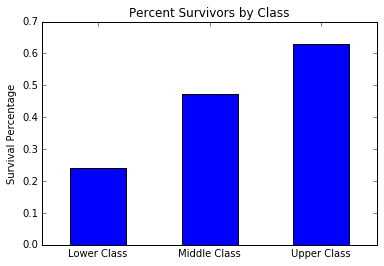

In [8]:
# Graph Percent Survivors by CLASS
plot_bar_values([lower_surv_per, middle_surv_per, upper_surv_per], ["Lower Class", "Middle Class", "Upper Class"], "Class")

Analysis CLASS:

Survival Percentage appears to increase in a positive way with Class status. Both the Middle and Upper Classes are largely above the PSTS whereas the Lower class is far below the PSTS. This indicates a correlation between survival and Class; the higher the passeger's class the more likely they are to survive.

Missing Values:

Because every data point contained information on CLASS and SURVIVED no values have been excluded.

## Percent Survivors by Sex

In [9]:
# Inspect factor SEX from key "Sex"
key_df_stats("Sex")

Total Passengers by Sex: 891
Percent Survival by Sex: 0.383838383838


Passengers with SEX information had a 38% chance of survival; this is the same as the PSTS.

In [10]:
# Find Percent Survival based on SEX
male_surv_df = tdata_df[["Sex", "Survived"]].query("Sex == 'male'")
male_surv_per = male_surv_df["Survived"].dropna().mean()
print "Male Survival: %.2f" % male_surv_per

female_surv_df = tdata_df[["Sex", "Survived"]].query("Sex == 'female'")
female_surv_per = female_surv_df["Survived"].dropna().mean()
print "Female Survival: %.2f" % female_surv_per

Male Survival: 0.19
Female Survival: 0.74


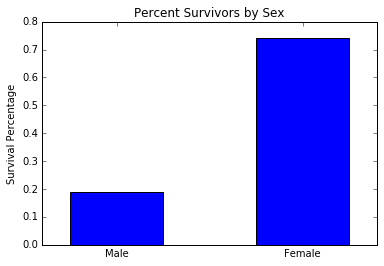

In [11]:
# Graph Percent Survivors by Sex
plot_bar_values([male_surv_per, female_surv_per], ["Male", "Female"], "Sex")

Analysis SEX:

Sex has the highest disparity between surviving and not surviving. Being a woman onboard the Titanic appears to DOUBLE the chance of survival, whereas being a male appears to HALVE the chance.

Missing Vales:

Because every data point contained information on SEX and SURVIVED no values have been excluded.

## Survivors by Age

In [12]:
# Inspect factor AGE from key "Age"
key_df_stats("Age")

Total Passengers by Age: 714
Percent Survival by Age: 0.406162464986


177 passengers with missing AGE information were ignored in the AGE calculations. 

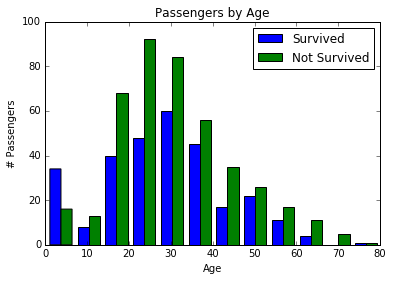

In [13]:
# Create Age Data Frame
age_df = tdata_df.groupby("Age", as_index=False).apply(lambda x: x)

# Split Age Data Frames: Survived and Not_Survived
age_surv_df = age_df[["Age", "Survived"]].dropna().query("Survived == 1")
age_nsurv_df = age_df[["Age", "Survived"]].dropna().query("Survived == 0")

# Create histogram of Survived and Not_Survived Data Frames
plots = [age_surv_df["Age"], age_nsurv_df["Age"]]
plt.hist(plots, bins=12)
plt.legend(['Survived', 'Not Survived'])
plt.title("Passengers by Age")
plt.ylabel("# Passengers")
plt.xlabel("Age")
plt.show()

Analysis AGE:

The only age that had more survivors were for passengers between the ages of zero and ten. Being young likely influenced chance of survival in a positive way.

Missing Values:

Of the total 891 values, only 714 had information on AGE. Any value not containing AGE information was removed from this calculation. AGE data was not rounded; any data provided on AGE was treated as fully accurate (this is in contrast with the original documentation clearly stating some ages were estimated).

## Survivors by Fare

In [14]:
# Inspect factor FARE from key "Fare"
key_df_stats("Fare")

Total Passengers by Fare: 891
Percent Survival by Fare: 0.383838383838


Passengers with FARE information had a 38% chance of survival; this is the same as the PSTS.

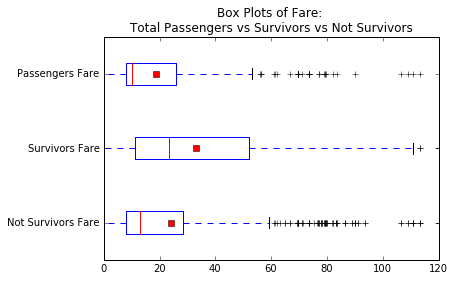

**Red Dot showcases the mean


In [15]:
# Create FARE Data Frame of all Passengers and all Survivors
fare_df = tdata_df.groupby("Fare", as_index=False).apply(lambda x: x)
fare_surv_df = fare_df[["Fare", "Survived"]].dropna().query("Survived == 1")
fare_nsurv_df = fare_df[["Fare", "Survived"]].dropna().query("Survived == 0")

# Create two box plots of Passengers FARE vs Survivors FARE
boxes = [fare_df[["Fare"]].query("Fare <= 120"), 
         fare_surv_df[["Fare"]].query("Fare <= 120"), 
         fare_nsurv_df[["Fare"]].query("Fare <= 120")]
plt.boxplot(boxes,  vert=False, showmeans=True)
plt.yticks([3,2,1], ['Passengers Fare', 'Survivors Fare', 'Not Survivors Fare'])
plt.title("Box Plots of Fare: \nTotal Passengers vs Survivors vs Not Survivors")
plt.show()
print "**Red Dot showcases the mean"

Analysis FARE:

As viewed from the box plot figure, paying a higher FARE indicates a more likely chance of survival. 

Missing Values:

Every passenger contained FARE data. FARE values above 120 were excluded from this data set because they were viewed as outliers. Median values of FARE were calculated instead of mean because outliers far exceeded the usual FARE.

## Percent Survivors by Embarked

In [16]:
# Inspect factor EMBARKATION from key "Embarked"
key_df_stats("Embarked")

Total Passengers by Embarked: 889
Percent Survival by Embarked: 0.382452193476


2 passengers with missing EMBARKED information were ignored in the EMBARKED calculations.

In [17]:
# Graph Percent Survivors by Embarked
c_surv_df = tdata_df[["Embarked", "Survived"]].query("Embarked == 'C'")
c_surv_per = c_surv_df["Survived"].dropna().mean()
print "Cherbourg Survival: %.2f" % c_surv_per

q_surv_df = tdata_df[["Embarked", "Survived"]].query("Embarked == 'Q'")
q_surv_per = q_surv_df["Survived"].dropna().mean()
print "Queenstown Survival: %.2f" % q_surv_per

s_surv_df = tdata_df[["Embarked", "Survived"]].query("Embarked == 'S'")
s_surv_per = s_surv_df["Survived"].dropna().mean()
print "Southampton Survival: %.2f" % s_surv_per

Cherbourg Survival: 0.55
Queenstown Survival: 0.39
Southampton Survival: 0.34


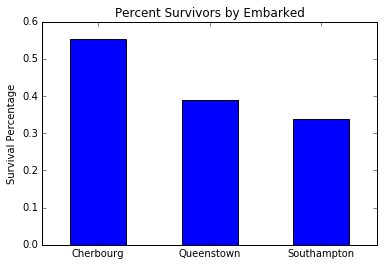

In [18]:
# Graph Survivors by EMBARKED
plot_bar_values([c_surv_per, q_surv_per, s_surv_per], ["Cherbourg", "Queenstown", "Southampton"], "Embarked")

Analysis EMBARKED:

Survival rates of passengers from both Queenstown and Southampton differed little compared to the PSTS (about 1/1 ratio). It is not assumed, but is interesting to note, passengers from Cherbourg show to have a significant boost in survival (just under ~1.5 times the PSTS). 

Missing Values:

Of 891 passengers only 889 had information values for EMBARKED and SURVIVED. The two passengers without EMBARKED data were omitted from calculations.

### Overall Analysis:

Calculations are based upon data of 891 of the ~2200 passengers onboard the Titanic. This analysis assumes all data presented is true. Passengers missing information were excluded from those respective areas of calculation.

Strong factors appearing to have a direct correlation on survival were being wealthy (CLASS and FARE), a female (SEX), and being young (AGE); the most apparent, influencial factor was SEX. Although this information doesn't specify as to *why* those factors increased chance of survival, the traditional practice of extracting women and children from harm first likely had an influence. 

Cherbourg (EMBARKED) was a bit of a surprise. At first guess point of origination would have no influence of survival once everybody was on the boat. Perchance Cherbourg was significantly more affluent (CLASS and FARE), had more females as passengers (SEX), had more children as passengers (AGE), or truly was those at Cherbourg were better at surviving. 

If the data was to be further inspected FARE and CLASS would tested for correlation. Likewise, the data set would be expanded to include the full set of passengers.

Two Factors that were not calculated were Family Onboard (SIBSP/PARCH) and Ticket # (TICKET). If SIBSP/Parch were to be calculated it would be based on 'if passenger has family onboard' as opposed to 'how much family onboard'; the dataset appears to have very few familes. TICKET has a vast array of unique values with differing ranges of digits and letters; although a function was written to dig out just the numbers it wasn't evidently clear how to approach analyzing TICKET in a sufficient way.

Additional information per account that may have influenced survival is LOCATION of passenger at time of emergency. Individuals located closer to survival boats may have had a higher chance of survival.